In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Jun 27 15:20:31 2020

@author: parinazfarajiparvar
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

import seaborn as sns
sns.set()
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.FATAL) # suppress unhelpful tf warnings

from keras.models import Model
from keras.layers import Input, Conv1D, Dense, Activation, Dropout, Lambda, Multiply, Add, Concatenate
from keras.optimizers import Adam

/wsu/el7/pre-compiled/python/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/wsu/el7/pre-compiled/python/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/wsu/el7/pre-compiled/python/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/wsu/el7/pre-compiled/python/3.7/lib/python3.7/site-

In [2]:

'''Reading data'''
df_data = pd.read_csv('/wsu/home/gc/gc40/gc4042/nima projedct/data/RDS_NA Remove.csv')
df_data.head()

,Day Number,Date,Year,Month,Day,Time,371.4,373.5,374.6,375.3,...,386.6,387.1,387.8,388.5,389.5,392.1,392.4,392.8,393.5,393.9
0,1,6012019,2019,6,1,00:00:00,61.000000,61.833333,62.25,58.000000,...,56.166667,53.875000,59.00,60.6,67.600000,58.833333,55.714286,61.833333,61.000000,54.4
1,1,6012019,2019,6,1,00:01:00,62.666667,62.666667,61.00,58.400000,...,57.800000,57.200000,59.00,58.0,72.125000,58.666667,56.800000,60.714286,61.000000,54.6
2,1,6012019,2019,6,1,00:02:00,62.833333,63.333333,57.20,55.857143,...,57.200000,54.444444,59.60,56.0,71.833333,57.333333,52.800000,60.777778,61.000000,55.8
3,1,6012019,2019,6,1,00:03:00,62.000000,64.166667,59.00,57.500000,...,58.333333,55.777778,59.25,58.5,68.285714,58.400000,54.142857,61.428571,56.000000,56.5
4,1,6012019,2019,6,1,00:04:00,59.000000,64.000000,59.00,57.714286,...,56.750000,58.571429,61.00,59.5,65.000000,58.500000,50.666667,61.800000,59.714286,57.0


In [28]:
ave_5min = df_data.groupby(np.arange(len(df_data))).mean()

In [29]:
ave_5min

,Day Number,Date,Year,Month,Day,371.4,373.5,374.6,375.3,375.8,...,386.6,387.1,387.8,388.5,389.5,392.1,392.4,392.8,393.5,393.9
0,1.0,6012019.0,2019.0,6.0,1.0,60.346970,64.050000,60.148485,58.499026,67.228355,...,56.782576,56.268579,60.703030,58.145455,67.409307,58.977273,54.995022,60.063167,59.879870,56.833333
1,1.0,6012019.0,2019.0,6.0,1.0,63.512121,63.377273,60.148485,56.832035,70.529221,...,57.262987,58.925830,60.610606,59.509091,64.435606,62.157576,58.506061,58.764033,62.219805,58.092424
2,1.0,6012019.0,2019.0,6.0,1.0,61.966667,62.037879,59.225758,57.590368,66.934199,...,57.427706,56.440476,60.659091,59.245455,70.440657,58.568182,58.492424,60.623377,61.135065,58.465152
3,1.0,6012019.0,2019.0,6.0,1.0,62.416667,63.203030,57.671212,56.679004,69.415152,...,58.913853,56.885931,62.150000,58.024242,70.873160,57.704545,57.236364,60.386183,61.913095,57.850000
4,1.0,6012019.0,2019.0,6.0,1.0,61.425758,61.263636,58.900000,56.315693,72.017532,...,59.522511,59.013131,60.227273,58.925758,66.178355,58.290909,55.653030,59.265224,62.417532,56.569697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22512,175.0,11302019.0,2019.0,11.0,30.0,59.925758,65.131818,60.066667,58.365368,64.590043,...,61.997835,54.600866,67.012121,58.345455,57.152201,58.198485,53.675000,56.405447,59.641558,58.003030
22513,175.0,11302019.0,2019.0,11.0,30.0,59.880303,62.480303,59.154545,59.613636,65.583658,...,60.064935,52.418506,68.190909,57.939394,56.211219,58.581818,54.986039,58.188492,59.500108,57.174242
22514,175.0,11302019.0,2019.0,11.0,30.0,48.083333,56.824242,56.657576,54.441017,65.907359,...,60.619913,50.877561,67.806061,55.927273,56.281746,59.433333,53.359524,57.912626,59.394697,56.777273
22515,175.0,11302019.0,2019.0,11.0,30.0,54.309091,55.115152,57.142424,54.861472,68.306277,...,58.710606,48.250000,68.425758,55.157576,57.827020,58.245455,49.212121,58.545094,56.939394,53.540909


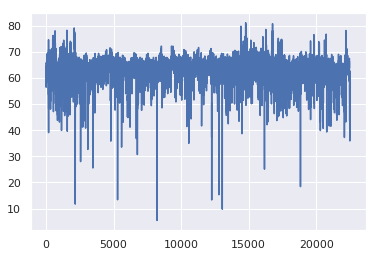

In [30]:
input_data = ave_5min.loc[:,'371.4'].values
plt.plot(range(len(input_data)),input_data)

In [31]:
past_window = 50
future_window = 10
X = []
Y = []
for i in range(len(input_data) - (past_window + future_window)):
    X.append(input_data[i:i + past_window])
    Y.append(input_data[i + past_window:i + past_window + future_window])

X = np.array(X)
Y = np.array(Y)
Y = np.expand_dims(Y, axis =2)
X = np.expand_dims(X, axis =2)
X_train = []
Y_train = []
X_test = []
Y_test = []

X_train = X[:int(len(X) * 0.9)]
Y_train = Y[:int(len(Y) * 0.9)]
X_train = np.stack(X_train)
Y_train = np.stack(Y_train)
X_test = X[int(len(X) * 0.9):]
Y_test = Y[int(len(Y) * 0.9):]
X_test = np.stack(X_test)
Y_test = np.stack(Y_test)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
conv1d_199 (Conv1D)             (None, None, 32)     64          input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_200 (Conv1D)             (None, None, 64)     4160        conv1d_199[0][0]                 
__________________________________________________________________________________________________
conv1d_201 (Conv1D)             (None, None, 64)     4160        conv1d_199[0][0]                 
__________________________________________________________________________________________________
activation

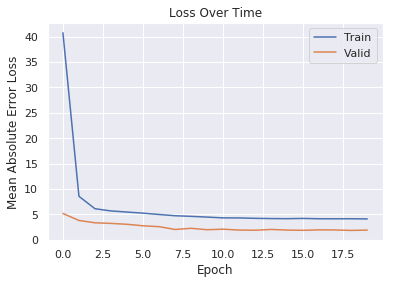

In [32]:

from keras.callbacks import EarlyStopping

# convolutional operation parameters
n_filters = 64 # 32 
filter_width = 2
dilation_rates = [2**i for i in range(8)] * 2 

# define an input history series and pass it through a stack of dilated causal convolution blocks. 
# Note the feature input dimension corresponds to the raw series and all exogenous features  
history_seq = Input(shape=(None, 1))
x = history_seq

skips = []
for dilation_rate in dilation_rates:
    
    # preprocessing - equivalent to time-distributed dense
    x = Conv1D(32, 1, padding='same', activation='relu')(x) 
    
    # filter convolution
    x_f = Conv1D(filters=n_filters,
                 kernel_size=filter_width, 
                 padding='causal',
                 dilation_rate=dilation_rate)(x)
    
    # gating convolution
    x_g = Conv1D(filters=n_filters,
                 kernel_size=filter_width, 
                 padding='causal',
                 dilation_rate=dilation_rate)(x)
    
    # multiply filter and gating branches
    z = Multiply()([Activation('tanh')(x_f),
                    Activation('sigmoid')(x_g)])
    
    # postprocessing - equivalent to time-distributed dense
    z = Conv1D(32, 1, padding='same', activation='relu')(z)
    
    # residual connection
    x = Add()([x, z])    
    
    # collect skip connections
    skips.append(z)

# add all skip connection outputs 
out = Activation('relu')(Add()(skips))

# final time-distributed dense layers 
out = Conv1D(128, 1, padding='same')(out)
out = Activation('relu')(out)
out = Dropout(.2)(out)
out = Conv1D(1, 1, padding='same')(out)

# extract the last 60 time steps as the training target
def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':10})(out)


model = Model(history_seq, pred_seq_train)
model.compile(Adam(), loss='mean_absolute_error')
model.summary()
# feeding data:
first_n_samples = df_data.shape[0]
batch_size = 2**10 
epochs = 20

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
print(X_train.shape)
print(Y_train.shape)
lagged_Y_train = Y_train[:,:-1,:1]
encoder_input_data = np.concatenate([X_train, lagged_Y_train], axis=1)
model.compile(Adam(), loss='mean_absolute_error', metrics=['mse', 'mae', 'mape'])
history = model.fit(encoder_input_data, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                   validation_split=0.2)  

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

In [33]:
preds = model.predict(X_test, batch_size=batch_size)

In [34]:
from keras import backend as K

tf_session = K.get_session()
mape = tf.keras.losses.MeanAbsolutePercentageError()
MAPE_error = mape(Y_test, preds)

print('mape=%f' % MAPE_error.eval(session=tf_session))

mape=5.418583


In [35]:
def plot_prediction(sample_ind):
    plt.figure(figsize=(10,6))   
    
    plt.plot(range(1,past_window+1),X_test[sample_ind,:,:])
    plt.plot(range(past_window,past_window+future_window),Y_test[sample_ind,:,:],color='orange')
    plt.plot(range(past_window,past_window+future_window),preds[sample_ind,:,:],color='teal',linestyle='--')
    
    plt.title('Encoder Series Tail of Length %d, Target Series, and Predictions' % past_window)
    plt.legend(['Encoding Series','Target Series','Predictions'])

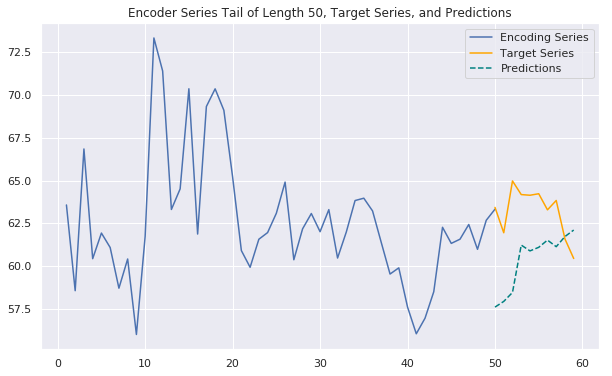

In [38]:
plot_prediction(3)

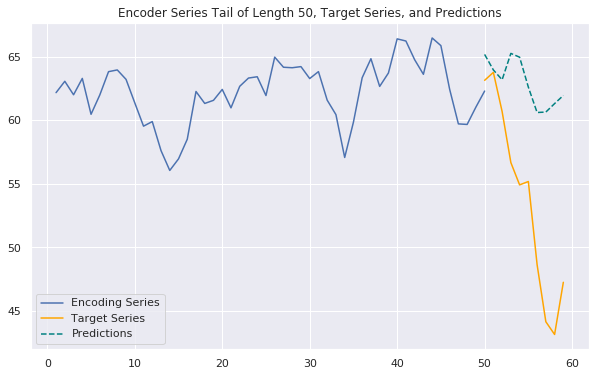

In [39]:
plot_prediction(30)

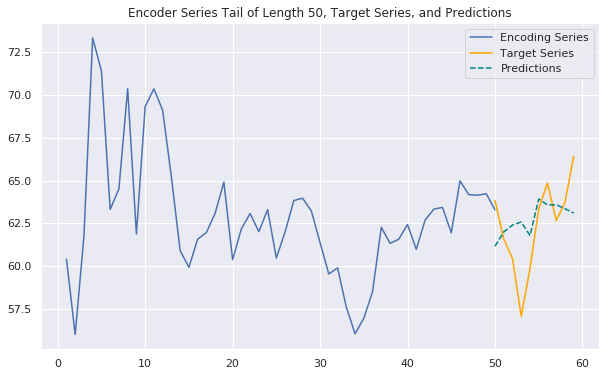

In [40]:
plot_prediction(10)

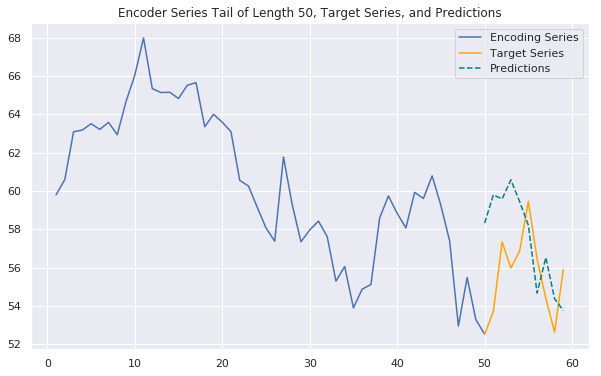

In [41]:
plot_prediction(100)